In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
patents=pd.read_csv('../data/gp-q2-7topics.csv', index_col='code') 
patents['doctype'] = ['patent' for patent in patents.index]
patents['class'] = [cl if cl=='G06' or cl=='H04' else 'other' for cl in patents['class'] ]
print(patents['class'].value_counts())
patents.head()

G06      4726
H04      3304
other    1446
Name: class, dtype: int64


,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic,doctype
code,,,,,,,,,,
US8370262B2,0,System and method for performing secure online...,2013-02-05,"['US10681025B2', 'CN106664208B', 'AU2012261635...",\nThe system and method performing secure onli...,G06,2013,\nthe system and method performing secure onli...,4,patent
US10237070B2,1,System and method for sharing keys across auth...,2019-03-19,"['US10268809B2', 'JP6538821B2', 'KR101721032B1...","\nA system, apparatus, method, and machine rea...",H04,2019,\na system apparatus method and machine readab...,4,patent
US10637853B2,2,Authentication techniques including speech and...,2020-04-28,"['US10706421B2', 'US20160269411A1', 'US1021258...","\nA system, apparatus, method, and machine rea...",H04,2020,\na system apparatus method and machine readab...,4,patent
US10558974B2,3,Methods and systems of providing verification ...,2020-02-11,"['US20190149537A1', 'US20180308098A1', 'US2018...",\nA method and system of providing verificatio...,G06,2020,\na method and system of providing verificatio...,4,patent
US10769635B2,4,Authentication techniques including speech and...,2020-09-08,"['US9531710B2', 'US10706421B2', 'US20160269411...","\nA system, apparatus, method, and machine rea...",G06,2020,\na system apparatus method and machine readab...,1,patent


In [3]:

articles = pd.read_csv('../data/scopus-q2-7topics.csv',index_col='code')
articles['doctype'] = ['article' for i in articles.index]
articles.head()

,Unnamed: 0,title,year,link,abstract,keyword,topic,doctype
code,,,,,,,,
85062908267,0,Terrorist network analysis and identification ...,2018,https://www.scopus.com/inward/record.uri?eid=2...,The prediction of terrorist network and identi...,Internet of things; Learning algorithms; Smart...,0,article
85092037876,1,Who makes revolution in the age of speculative...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Contemporary theories of social emancipation c...,NaN,3,article
85061535070,2,One-shot learning approach for unknown malware...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Early detection of new kinds of malware always...,Character recognition; Classification (of info...,3,article
85055699089,3,Regulating Artificial Intelligence Proposal fo...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Given the ubiquity of artificial intelligence ...,Autonomous vehicles; International trade; Pers...,5,article
85061405847,4,Defending Against Adversarial Samples Without ...,2018,https://www.scopus.com/inward/record.uri?eid=2...,It has been recently shown that deep neural ne...,Computer crime; Data mining; Deep neural netwo...,0,article


In [4]:
docs = patents[['year','topic','doctype']].append(articles[['year','topic','doctype']])
docs

,year,topic,doctype
code,,,
US8370262B2,2013,4,patent
US10237070B2,2019,4,patent
US10637853B2,2020,4,patent
US10558974B2,2020,4,patent
US10769635B2,2020,1,patent
...,...,...,...
85012264765,2001,3,article
77956055808,2001,3,article
35786351,2001,3,article


# Some Counting

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


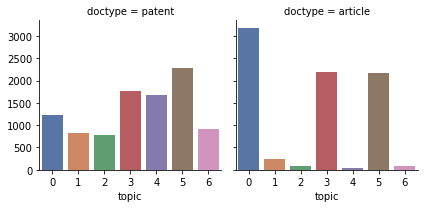

In [5]:
g = sns.FacetGrid(docs, col="doctype")
g.map(sns.countplot,'topic', palette='deep')


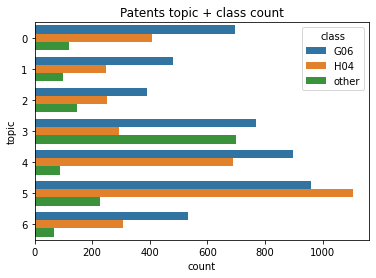

In [6]:
ax = sns.countplot(y="topic", hue="class", data=patents).set_title("Patents topic + class count")

In [7]:
patents['Year'] = pd.DatetimeIndex(patents['pub_date']).year

In [8]:
articlesCntByYear = articles.groupby(['topic', 'year']).size().reset_index(name='counts')

In [9]:
patentsTopicCntByYear = patents.groupby(['topic', 'year']).size().reset_index(name='counts')
patentsClassCntByYear = patents.groupby(['class', 'year']).size().reset_index(name='counts')

In [10]:
patentsClassCntByYear

,class,year,counts
0,G06,1991,1
1,G06,1995,1
2,G06,1996,1
3,G06,1998,7
4,G06,1999,2
...,...,...,...
76,other,2017,97
77,other,2018,131
78,other,2019,219
79,other,2020,295


In [11]:
articlesCntByYear = articlesCntByYear[articlesCntByYear['year'] != 2021]
patentsTopicCntByYear = patentsTopicCntByYear[patentsTopicCntByYear['year'] != 2021]
patentsClassCntByYear = patentsClassCntByYear[patentsClassCntByYear['year'] != 2021]

# TREND ANALYSIS

 # Articles Trend

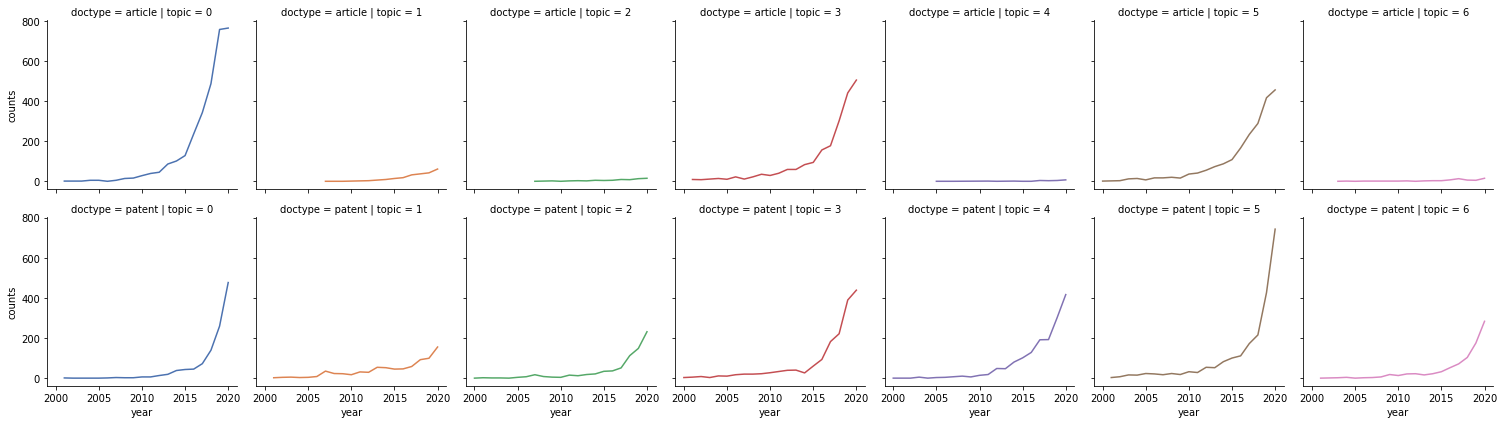

In [12]:
docs['year'] = docs['year'].astype(int)
docs_by_TypeTopicYear =  docs[(docs.year>= 2000)&(docs.year< 2021)&(docs.topic<8)].groupby(['doctype','topic', 'year']).size().reset_index(name='counts')
g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
g.map(sns.lineplot,'year','counts')

#docs_by_TypeTopicYear =  docs[(docs.year>= 2000)&(docs.year< 2021)&(docs.topic>=4)].groupby(['doctype','topic', 'year']).size().reset_index(name='counts')
#g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
#g.map(sns.lineplot,'year','counts')

#sns.lineplot(data=may_flights, x="year", y="passengers")

In [33]:
docs['year'] = docs['year'].astype(int)
docs_by_TypeTopicYear = docs[(docs.year>= 2000)&(docs.year< 2021)&(docs.topic<8)].groupby(['doctype','topic', 'year']).size().reset_index(name='counts')
g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
g.map(sns.lineplot,'year','counts')

#docs_by_TypeTopicYear =  docs[(docs.year>= 2000)&(docs.year< 2021)&(docs.topic>=4)].groupby(['doctype','topic', 'year']).size().reset_index(name='counts')
#g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
#g.map(sns.lineplot,'year','counts')

#sns.lineplot(data=may_flights, x="year", y="passengers")

ValueError: Wrong number of items passed 4, placement implies 255

In [118]:
def plot_trend(df,series,start_year=2000,end_year=2021,label=None):
    count =  dict(series.value_counts())
    trend = sorted(count)
    values = np.cumsum([count[key] for key in trend ])
    plt.plot(trend,values,label=label)
    

def plot_trends(df,col):
    for i in sorted(df[col].unique()):
        plot_trend(df,df[(df[col]==i)&(df['year']>2000)&(df['year']<2021)]['year'],label='topic '+str(i))
    plt.legend()
    plt.title('articles topic cumulative trend')
    plt.show()

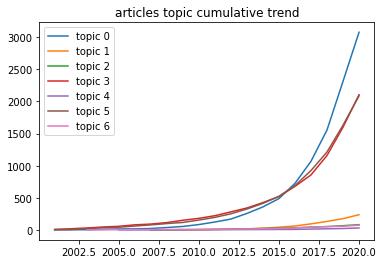

In [119]:
plot_trends(articles,'topic')

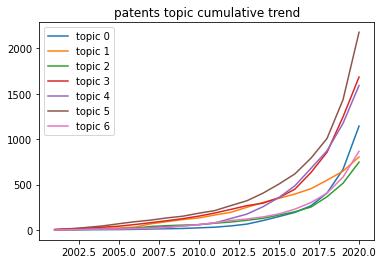

In [117]:
plot_trends(patents,'topic')

In [74]:
keys = trend.keys()
values= list(np.cumsum([i for i in trend.values]))
plt.plot(keys,values)
plt.show()

2020    477
2019    260
2018    140
2017     73
2016     46
2015     44
2014     39
2013     20
2012     14
2010      7
2011      7
2007      4
2009      3
2008      3
2006      2
2001      2
2005      1
2004      1
2002      1
Name: year, dtype: int64

In [66]:
print(keys)

Int64Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2010, 2011,
            2007, 2009, 2008, 2006, 2001, 2005, 2004, 2002],
           dtype='int64')


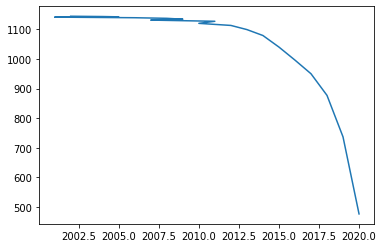

In [61]:
plot_trend(patents, patents[(patents['topic']==0)&(patents['year']>2000)&(patents['year']<2021)]['year'])

In [ ]:
for t in patents['topic'].unique():
    d = patents[['year'] >= 2000 and  patents['year']<2021 and patents.topic==t]:
    d = 

TypeError: float() argument must be a string or a number, not 'dict'

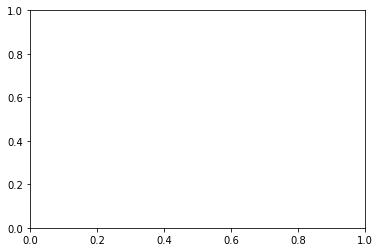

In [35]:
plt.plot({'a':34,'b':45})

Text(0.5, 1.0, 'articles topic trend')

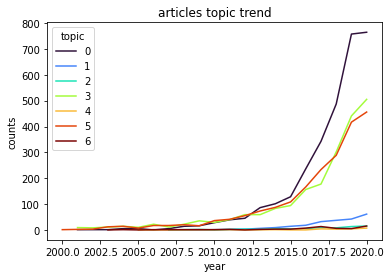

In [13]:
sns.lineplot(data=articlesCntByYear, x="year", y="counts", hue="topic", legend="full", palette="turbo").set_title("articles topic trend")

# Patent Analysis 

Text(0.5, 1.0, 'patents topic trend')

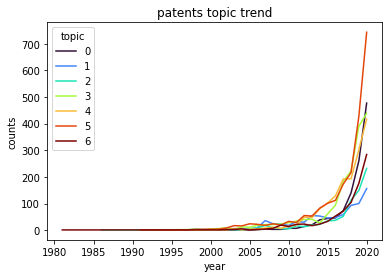

In [17]:
sns.lineplot(data=patentsTopicCntByYear, x="year", y="counts", hue="topic", legend="full", palette="turbo").set_title("patents topic trend")

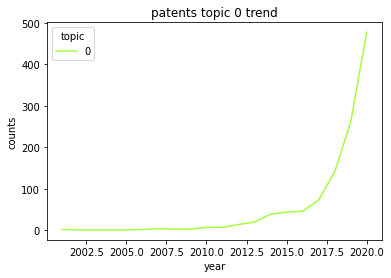

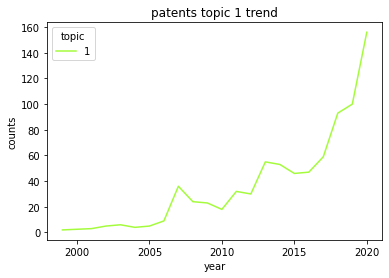

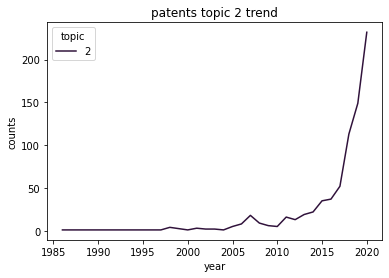

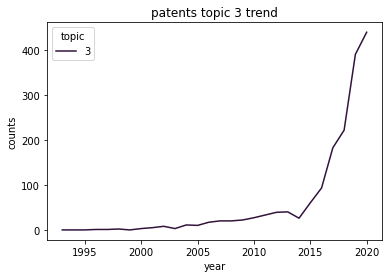

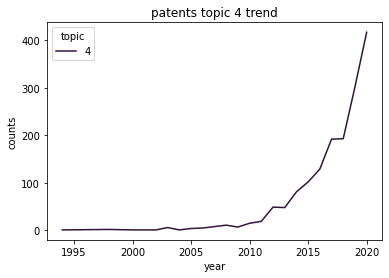

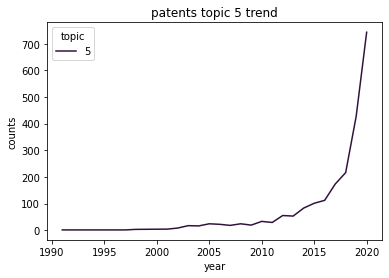

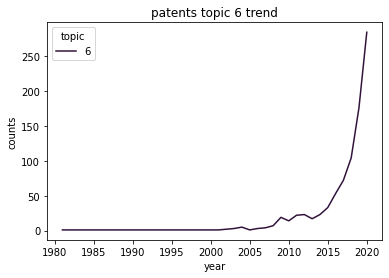

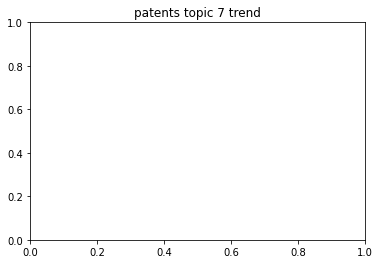

In [18]:
for i in range(8):
    plt.figure(i)
    s=sns.lineplot(data=patentsTopicCntByYear[patentsTopicCntByYear['topic'] == i], x="year", y="counts", hue="topic", legend="full", palette="turbo").set_title("patents topic " + str(i) +" trend")

Text(0.5, 1.0, 'patents class trend')

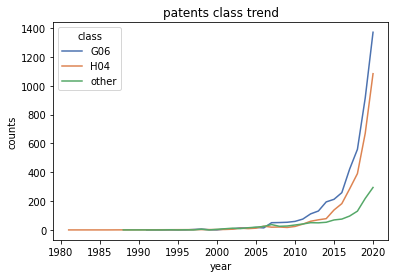

In [19]:
sns.lineplot(data=patentsClassCntByYear, x="year", y="counts", hue="class", legend="full", palette="deep").set_title("patents class trend")

In [20]:
allDocumentsByYear = pd.concat([articlesCntByYear, patentsTopicCntByYear]).groupby(['topic', 'year'],as_index=False).sum()
allDocumentsByYear

,topic,year,counts
0,0,2001,4
1,0,2002,1
2,0,2003,2
3,0,2004,7
4,0,2005,7
...,...,...,...
160,6,2016,61
161,6,2017,86
162,6,2018,111
163,6,2019,182


# All Documents Analysis

Text(0.5, 1.0, 'all documents topic trend')

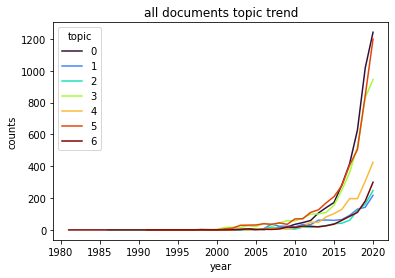

In [21]:
sns.lineplot(data=allDocumentsByYear, x="year", y="counts", hue="topic", legend="full", palette="turbo").set_title("all documents topic trend")

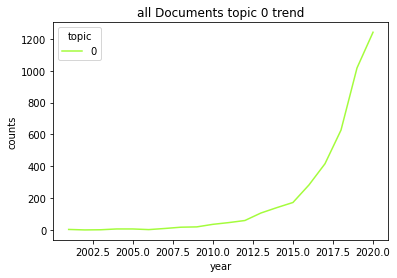

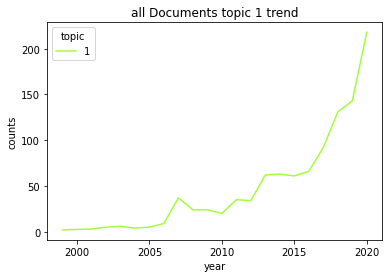

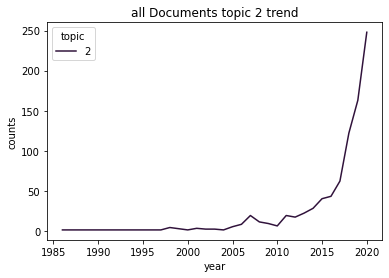

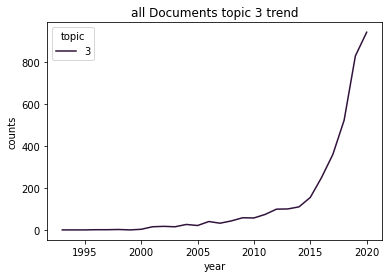

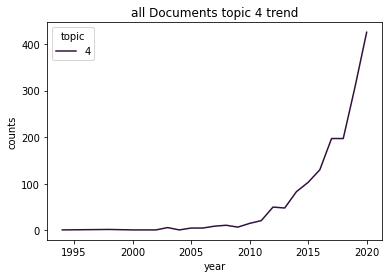

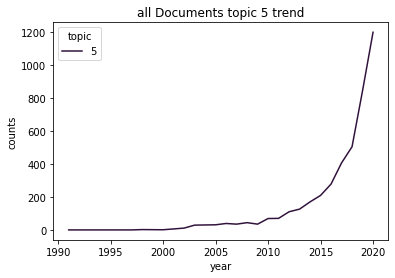

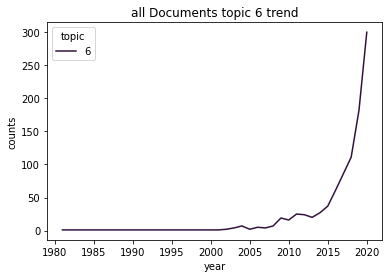

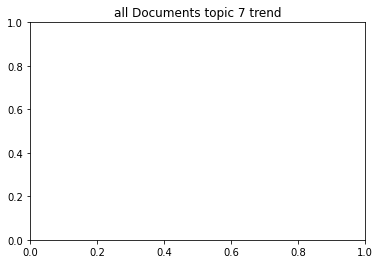

In [22]:
for i in range(8):
    plt.figure(i)
    s=sns.lineplot(data=allDocumentsByYear[allDocumentsByYear['topic'] == i], x="year", y="counts", hue="topic", legend="full", palette="turbo").set_title("all Documents topic " + str(i) +" trend")

# Louvier trends

In [23]:
patents = pd.read_csv("../data/gp-q2-7topics-louvain.csv",index_col='code')

print(patents.isnull().sum())

patents.head()

Unnamed: 0               0
title                    0
pub_date                 0
citations                0
abstract                 0
class                    0
year                     0
abstract_processed       0
topic                    0
class_topic              0
core                     0
louvain               1372
dtype: int64


,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic,class_topic,core,louvain
code,,,,,,,,,,,,
US8370262B2,0,System and method for performing secure online...,2013-02-05,"['US10681025B2', 'CN106664208B', 'AU2012261635...",\nThe system and method performing secure onli...,G06,2013,\nthe system and method performing secure onli...,4,G06_4,2,0.0
US10237070B2,1,System and method for sharing keys across auth...,2019-03-19,"['US10268809B2', 'JP6538821B2', 'KR101721032B1...","\nA system, apparatus, method, and machine rea...",H04,2019,\na system apparatus method and machine readab...,4,H04_4,2,0.0
US10637853B2,2,Authentication techniques including speech and...,2020-04-28,"['US10706421B2', 'US20160269411A1', 'US1021258...","\nA system, apparatus, method, and machine rea...",H04,2020,\na system apparatus method and machine readab...,4,H04_4,2,0.0
US10558974B2,3,Methods and systems of providing verification ...,2020-02-11,"['US20190149537A1', 'US20180308098A1', 'US2018...",\nA method and system of providing verificatio...,G06,2020,\na method and system of providing verificatio...,4,G06_4,2,0.0
US10769635B2,4,Authentication techniques including speech and...,2020-09-08,"['US9531710B2', 'US10706421B2', 'US20160269411...","\nA system, apparatus, method, and machine rea...",G06,2020,\na system apparatus method and machine readab...,1,G06_1,2,0.0


In [27]:
counter=patents.louvain.value_counts()
for i in counter.keys(): 
    if counter[i]<=400: counter.pop(i)
counter

2.0     1245
6.0      983
10.0     790
5.0      668
3.0      649
0.0      595
14.0     486
9.0      461
1.0      402
Name: louvain, dtype: int64

In [28]:
groups = [int(i) for i in counter.keys()]
groups

[2, 6, 10, 5, 3, 0, 14, 9, 1]

In [29]:
patentsLouvainCntByYear = patents.groupby(['louvain', 'year']).size().reset_index(name='counts')

In [30]:
patentsLouvainCntByYear = patentsLouvainCntByYear[patentsLouvainCntByYear['year'] != 2021]
patentsLouvainCntByYear = patentsLouvainCntByYear[patentsLouvainCntByYear['louvain'].isin(groups)]

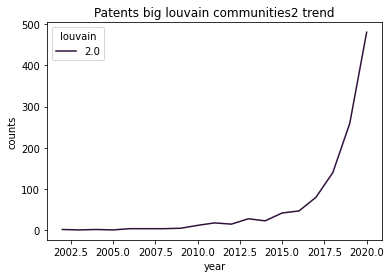

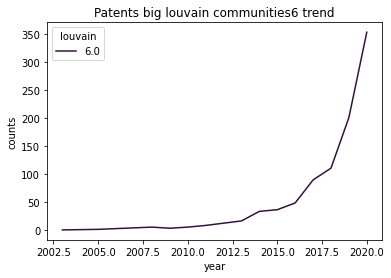

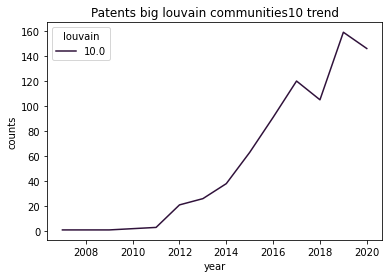

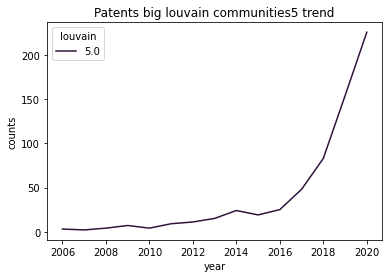

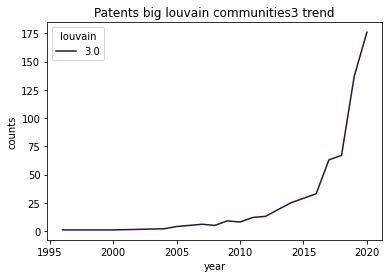

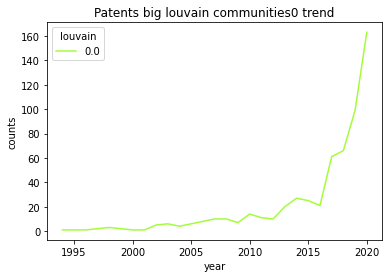

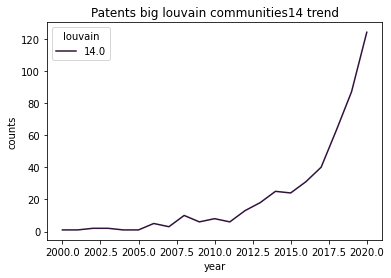

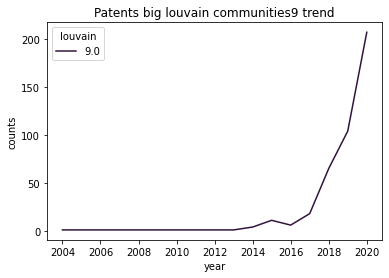

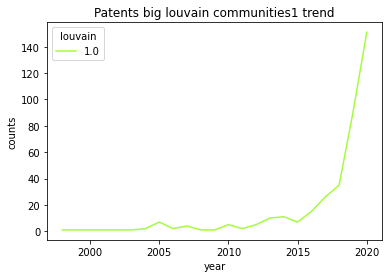

In [32]:
for i in groups:
    plt.figure(i)
    s=sns.lineplot(data=patentsLouvainCntByYear[patentsLouvainCntByYear['louvain'] == i], x="year", y="counts", hue="louvain", legend="full", palette="turbo").set_title("Patents big louvain communities" + str(i) +" trend")